<a href="https://colab.research.google.com/github/kevweolomu/Project-Invstigating-the-No-Show-Appointment-Dataset/blob/main/No_Show_Appointment_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Investigating the No-show appointments Dataset

## Project Description

The project investigates how patients keep up with medical appointments in Brazil. Several patients' characteristics and these relates to their medical appointments are analysed in the project. The dataset was analysed using the following libraries and packages: NumPy, Pandas, Matplotlib and Seaborn.

In [2]:
# Libraries used the data analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Data Wrangling

In [6]:
# Reading the data using the pandas library
# Using the .head method to display the first 5 rows of the dataset

appointment_data = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
appointment_data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
# Printing out the shape of the dataset which contains 110527 rows and 14 columns

print('Shape of the appointment_data:')
print(appointment_data.shape)

Shape of the appointment_data:
(110527, 14)


In [8]:
# Below is a concise summary of the dataset
# It lists out all the column names along with their corresponding data type and the number of non-null values in each of the columns. 
# The datatype includes 1 float, 8 integers and 5 objects
# ScheduledDay and AppointmentDay are objects but should be dates; this will be changed in the data cleaning section

appointment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [9]:
# Using the .isnull and .sum methods to check and caluclate the number of missing values in each column in the dataset
# There are no missing values in the dataset

appointment_data.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [10]:
# Checking for duplicated values; there are no duplicates

sum(appointment_data.duplicated())

0

In [11]:
# Checking the number of distinct or unique values in each column in the dataset

appointment_data.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [12]:
# Displaying some basic statistical details for columns with numberic values in the dataset
# The minimum value for age has a negative value and ths will be examined as it might be an error in the data

appointment_data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


## Data cleaning

In [13]:
# From basic stats, we can see can see min age of - 1; now checking to confirm the min and max age

appointment_data['Age'].min(), appointment_data['Age'].max()

(-1, 115)

In [14]:
# Using the .query method, the rows and columns containing age == -1 is filtered out
# Only one row has age == -1

appointment_data.query('Age == - 1')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [15]:
# Owing the fact that an age value can not be -1, the row filtered out in the cell above will be dropped from the dataset

appointment_data.drop(appointment_data[appointment_data['Age'] == -1].index, inplace = True)

In [16]:
# Confirming that the row has been dropped from the dataset

appointment_data.shape

(110526, 14)

In [17]:
# As mentioned in the previous section, the columns ScheuledDay and AppointmentDay are meant to be date type and not object type

# Code adapted from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html

pd.to_datetime(appointment_data['ScheduledDay'])

0        2016-04-29 18:38:08+00:00
1        2016-04-29 16:08:27+00:00
2        2016-04-29 16:19:04+00:00
3        2016-04-29 17:29:31+00:00
4        2016-04-29 16:07:23+00:00
                    ...           
110522   2016-05-03 09:15:35+00:00
110523   2016-05-03 07:27:33+00:00
110524   2016-04-27 16:03:52+00:00
110525   2016-04-27 15:09:23+00:00
110526   2016-04-27 13:30:56+00:00
Name: ScheduledDay, Length: 110526, dtype: datetime64[ns, UTC]

In [18]:
# Code adapted from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html

pd.to_datetime(appointment_data['AppointmentDay'])

0        2016-04-29 00:00:00+00:00
1        2016-04-29 00:00:00+00:00
2        2016-04-29 00:00:00+00:00
3        2016-04-29 00:00:00+00:00
4        2016-04-29 00:00:00+00:00
                    ...           
110522   2016-06-07 00:00:00+00:00
110523   2016-06-07 00:00:00+00:00
110524   2016-06-07 00:00:00+00:00
110525   2016-06-07 00:00:00+00:00
110526   2016-06-07 00:00:00+00:00
Name: AppointmentDay, Length: 110526, dtype: datetime64[ns, UTC]

In [19]:
# checking the type has been changed

appointment_data.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [20]:
appointment_data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [21]:
# The column 'Hispertension' is spelt wrongly so that will be corrected using the .rename method

appointment_data.rename(columns={'Hipertension' : 'Hypertension'}, inplace=True)

In [22]:
# The column 'Handcap' is spelt wrongly so that is also corrected

appointment_data.rename(columns={'Handcap' : 'Handicap'}, inplace=True)

In [23]:
# the column 'No-show' is renamed for consistency 
appointment_data.rename(columns={'No-show' : 'No_show'}, inplace=True)

In [24]:
appointment_data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# Exploratory Data Analysis

In [25]:
# total number of patients
appointment_data.No_show.count()

110526

***Question 1: What is the total number of the patients that attended their appointents and the ones that did not show up?***

In [26]:
# Total number of patients that attended their appointments and the ones that did not show-up

Appointment_attendance = appointment_data.groupby(['No_show'])['No_show'].count()
Appointment_attendance

No_show
No     88207
Yes    22319
Name: No_show, dtype: int64

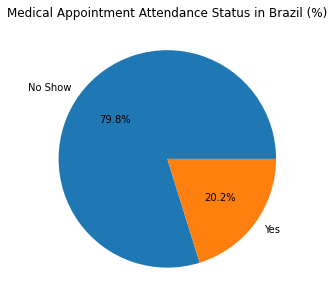

In [27]:
# A pie chart plot of the attendance status of patients in Brazil
#  The chart show that about 79.8% of the petients failed to show up for their appointments while only 20.2% attended their appointment 

fig = plt.figure(figsize =(10, 5))
plt.pie(Appointment_attendance, 
        labels = ['No Show', 'Yes'],
        autopct= '%.1f%%')
plt.title('Medical Appointment Attendance Status in Brazil (%)')
plt.show()

***Question 2: Is there a relationship between the other variables and the no-show variable?***



***1.Gender***

For the variable Gender, the data analysis show that more female (13.2%) turned up for their appointment than the males (7%). 

F    71839
M    38687
Name: Gender, dtype: int64


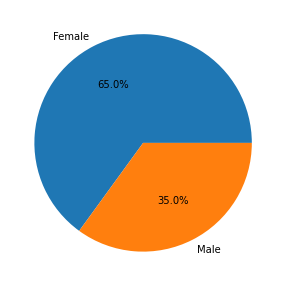

In [28]:
# There are 71839 female patients and 38687 male patients
# 65% of the patients are females and 35% males

print(appointment_data['Gender'].value_counts())

fig = plt.figure(figsize =(10, 5))
plt.pie(appointment_data['Gender'].value_counts().values, 
        autopct='%.1f%%', 
        labels = ['Female', 'Male'])
plt.show()

In [29]:
Gender_attendance = appointment_data.groupby(['Gender', 'No_show'])['No_show'].count()
Gender_attendance

Gender  No_show
F       No         57245
        Yes        14594
M       No         30962
        Yes         7725
Name: No_show, dtype: int64

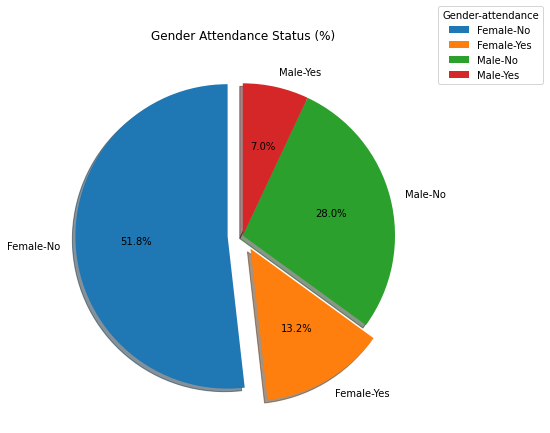

In [30]:
fig, ax = plt.subplots(figsize =(10, 7))

explode = (0.1, 0.1, 0.0, 0.0)
ax.pie(Gender_attendance, 
        labels = ['Female-No', 'Female-Yes', 'Male-No', 'Male-Yes'],
        autopct= '%.1f%%',
        shadow = True,
        startangle = 90,
        explode = explode)

ax.legend(title = 'Gender-attendance',
          loc = 'center left',
          bbox_to_anchor =(1, 0.5, 0.5, 1))

plt.title('Gender Attendance Status (%)')
plt.show()

***2. Scholarship***

The data analysis show that patients without scholarship (17.9%) turned up for their appointment than those with scholarship (2.3%). 

0    99665
1    10861
Name: Scholarship, dtype: int64


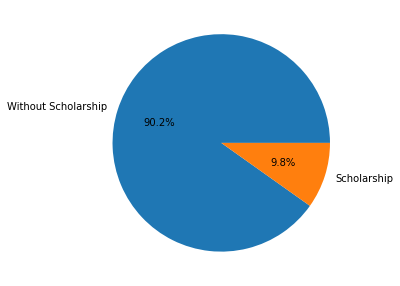

In [31]:
print(appointment_data['Scholarship'].value_counts())

fig = plt.figure(figsize =(10, 5))
plt.pie(appointment_data['Scholarship'].value_counts().values, 
        autopct='%.1f%%',
        labels = ['Without Scholarship', 'Scholarship']) 
plt.show()

In [32]:
Scholarship_attendance = appointment_data.groupby(['Scholarship', 'No_show'])['No_show'].count()
Scholarship_attendance

Scholarship  No_show
0            No         79924
             Yes        19741
1            No          8283
             Yes         2578
Name: No_show, dtype: int64

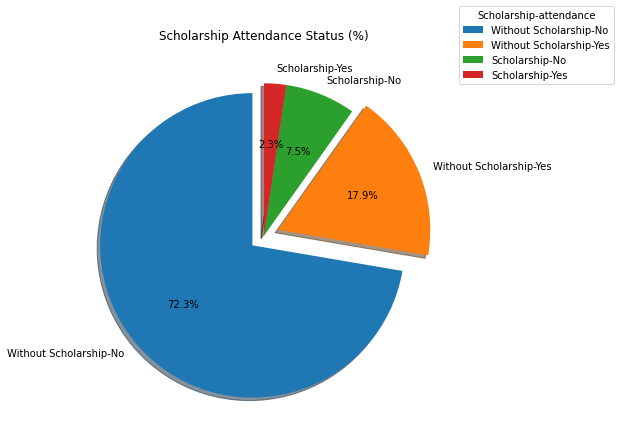

In [33]:
fig, ax = plt.subplots(figsize =(10, 7))

explode = (0.1, 0.1, 0.0, 0.0)
ax.pie(Scholarship_attendance, 
        labels = ['Without Scholarship-No', 'Without Scholarship-Yes', 'Scholarship-No', 'Scholarship-Yes'],
        autopct= '%.1f%%',
        shadow = True,
        startangle = 90,
        explode = explode)

ax.legend(title = 'Scholarship-attendance',
          loc = 'center left',
          bbox_to_anchor =(1, 0.5, 0.5, 1))

plt.title('Scholarship Attendance Status (%)')
plt.show()

***3. Hypertension***

There was a higher percent of non-hypertensive patients as compared to the hypertensive patients. The Non-hypertensive (16.8%) patients are seen to turned up for their appointment than those with hypertension (3.4%).

0    88725
1    21801
Name: Hypertension, dtype: int64


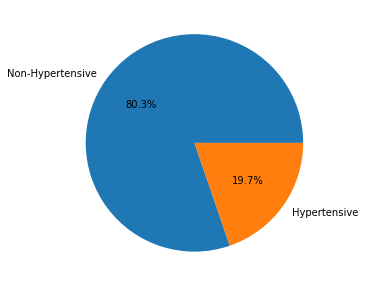

In [34]:
print(appointment_data['Hypertension'].value_counts())

fig = plt.figure(figsize =(10, 5))
plt.pie(appointment_data['Hypertension'].value_counts().values, 
        autopct='%.1f%%',
        labels = ['Non-Hypertensive', 'Hypertensive']) 
plt.show()

In [35]:
Hypertension_attendance = appointment_data.groupby(['Hypertension', 'No_show'])['No_show'].count()
Hypertension_attendance

Hypertension  No_show
0             No         70178
              Yes        18547
1             No         18029
              Yes         3772
Name: No_show, dtype: int64

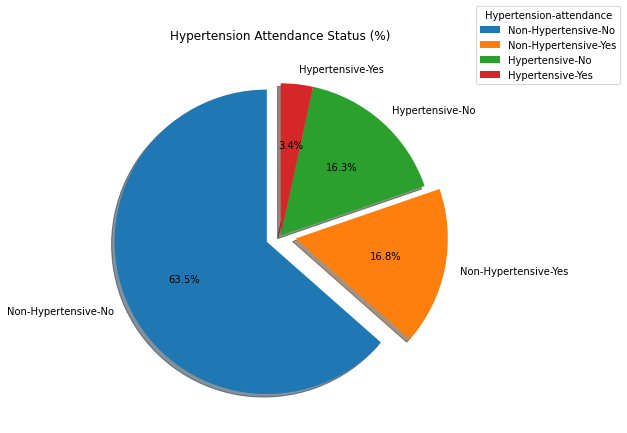

In [36]:
fig, ax = plt.subplots(figsize =(10, 7))

explode = (0.1, 0.1, 0.0, 0.0)
ax.pie(Hypertension_attendance, 
        labels = ['Non-Hypertensive-No', 'Non-Hypertensive-Yes', 'Hypertensive-No', 'Hypertensive-Yes'],
        autopct= '%.1f%%',
        shadow = True,
        startangle = 90,
        explode = explode)

ax.legend(title = 'Hypertension-attendance',
          loc = 'center left',
          bbox_to_anchor =(1, 0.5, 0.5, 1))

plt.title('Hypertension Attendance Status (%)')
plt.show()

***4. Diabetes***

A higher proportion of non-diabetic(18.9%) patients were seen to attend their appointment when compared to patients with diabetes (1.3%). 

0    102583
1      7943
Name: Diabetes, dtype: int64


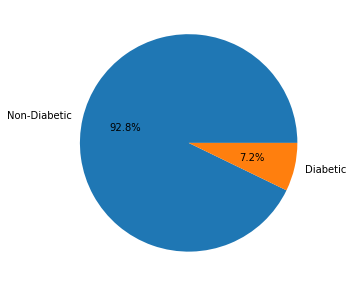

In [37]:
print(appointment_data['Diabetes'].value_counts())

fig = plt.figure(figsize =(10, 5))
plt.pie(appointment_data['Diabetes'].value_counts().values, 
        autopct='%.1f%%',
        labels = ['Non-Diabetic', 'Diabetic']) 
plt.show()

In [38]:
Diabetes_attendance = appointment_data.groupby(['Diabetes', 'No_show'])['No_show'].count()
Diabetes_attendance

Diabetes  No_show
0         No         81694
          Yes        20889
1         No          6513
          Yes         1430
Name: No_show, dtype: int64

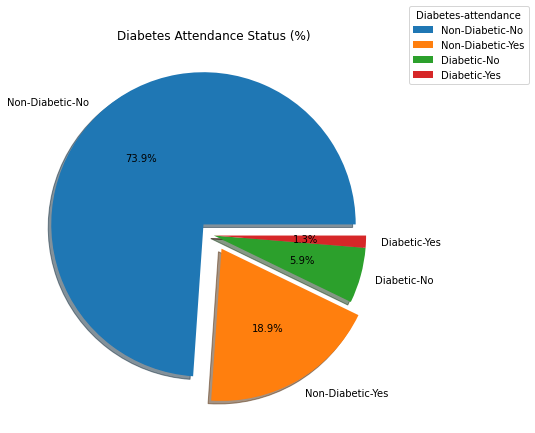

In [39]:
fig, ax = plt.subplots(figsize =(10, 7))

explode = (0.1, 0.1, 0.0, 0.0)
ax.pie(Diabetes_attendance, 
        labels = ['Non-Diabetic-No', 'Non-Diabetic-Yes', 'Diabetic-No', 'Diabetic-Yes'],
        autopct= '%.1f%%',
        shadow = True,
        #startangle = 90,
        explode = explode)

ax.legend(title = 'Diabetes-attendance',
          loc = 'center left',
          bbox_to_anchor =(1, 0.5, 0.5, 1))

plt.title('Diabetes Attendance Status (%)')
plt.show()

***5. Alcoholism***

Non-alcohoic patients (19.6%) tend to show up for their medical appointment when compared to the alcoholic patients (0.6%).

0    107166
1      3360
Name: Alcoholism, dtype: int64


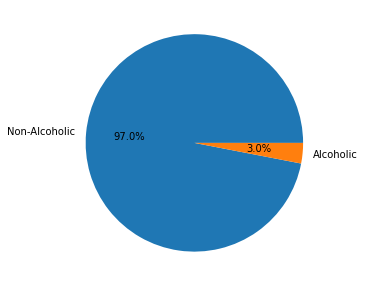

In [40]:
print(appointment_data['Alcoholism'].value_counts())

fig = plt.figure(figsize =(10, 5))
plt.pie(appointment_data['Alcoholism'].value_counts().values, 
        autopct='%.1f%%',
        labels = ['Non-Alcoholic', 'Alcoholic']) 
plt.show()

In [41]:
Alcoholism_attendance = appointment_data.groupby(['Alcoholism', 'No_show'])['No_show'].count()
Alcoholism_attendance

Alcoholism  No_show
0           No         85524
            Yes        21642
1           No          2683
            Yes          677
Name: No_show, dtype: int64

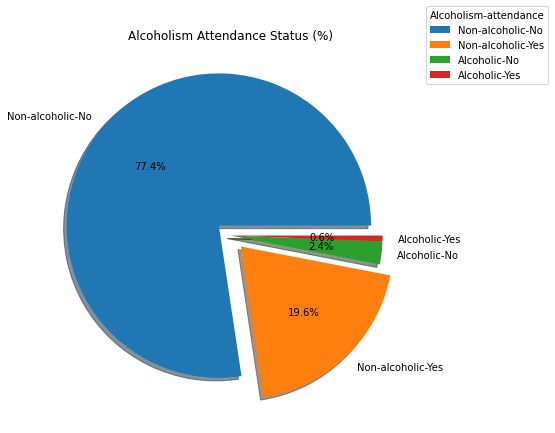

In [42]:
fig, ax = plt.subplots(figsize =(10, 7))

#explode = (0.1, 0.1, 0.0, 0.0)
ax.pie(Alcoholism_attendance, 
        labels = ['Non-alcoholic-No', 'Non-alcoholic-Yes', 'Alcoholic-No', 'Alcoholic-Yes'],
        autopct= '%.1f%%',
        shadow = True,
        #startangle = 90,
        explode = explode)

ax.legend(title = 'Alcoholism-attendance',
          loc = 'center left',
          bbox_to_anchor =(1, 0.5, 0.5, 1))

plt.title('Alcoholism Attendance Status (%)')
plt.show()

***6. SMS_recieved***

There was a large difference in the patients who did not received an SMS for their appointment but still attened (17.9%) and those that did recieved the sms but did not attend (2.3%).

0    75044
1    35482
Name: SMS_received, dtype: int64


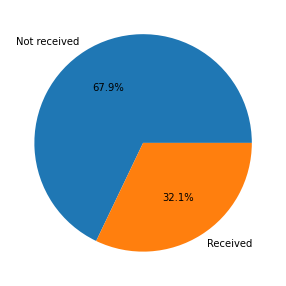

In [43]:
print(appointment_data['SMS_received'].value_counts())

fig = plt.figure(figsize =(10, 5))
plt.pie(appointment_data['SMS_received'].value_counts().values, 
        autopct='%.1f%%',
        labels = ['Not received', 'Received']) 
plt.show()

In [44]:
SMS_received_attendance = appointment_data.groupby(['SMS_received', 'No_show'])['No_show'].count()
SMS_received_attendance

SMS_received  No_show
0             No         62509
              Yes        12535
1             No         25698
              Yes         9784
Name: No_show, dtype: int64

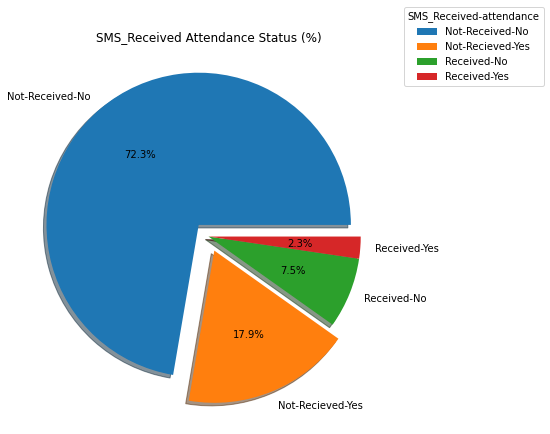

In [45]:
fig, ax = plt.subplots(figsize =(10, 7))

explode = (0.1, 0.1, 0.0, 0.0)
ax.pie(Scholarship_attendance, 
        labels = ['Not-Received-No', 'Not-Recieved-Yes', 'Received-No', 'Received-Yes'],
        autopct= '%.1f%%',
        shadow = True,
        #startangle = 90,
        explode = explode)

ax.legend(title = 'SMS_Received-attendance',
          loc = 'center left',
          bbox_to_anchor =(1, 0.5, 0.5, 1))

plt.title('SMS_Received Attendance Status (%)')
plt.show()

### **Conclusions**

The dataset consists of 14 variables with over a hundred thousand data points. The conclusion drawn at the end of the analysis was that many patients in Brazil do not attend their medical appointments. Only about 20% of patients were observed to have turned up for appointments.

Patients who do not have any health conditions such as hypertension, non-handicap, and non-alcoholic were seen to attend their medical appointment wen compared to patients with these health conditions.

Patients who do hot have scholarships had a higher appointment attendance when compared to those that have scholarhsips.

Finally, patients who did not recieve an sms reminder for their appointment had a higher appointment attendance than those that receieved sms reminders